# Develop a predictive maintenance model using LSTM-RNN to forecast equipment failures, enabling proactive maintenance and reducing downtime

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
data=pd.read_csv('monthly_milk_production.csv')
data.head(10)

,Date,Milk Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697
6,1962-07,640
7,1962-08,599
8,1962-09,568
9,1962-10,577


In [3]:
data.shape

(168, 2)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

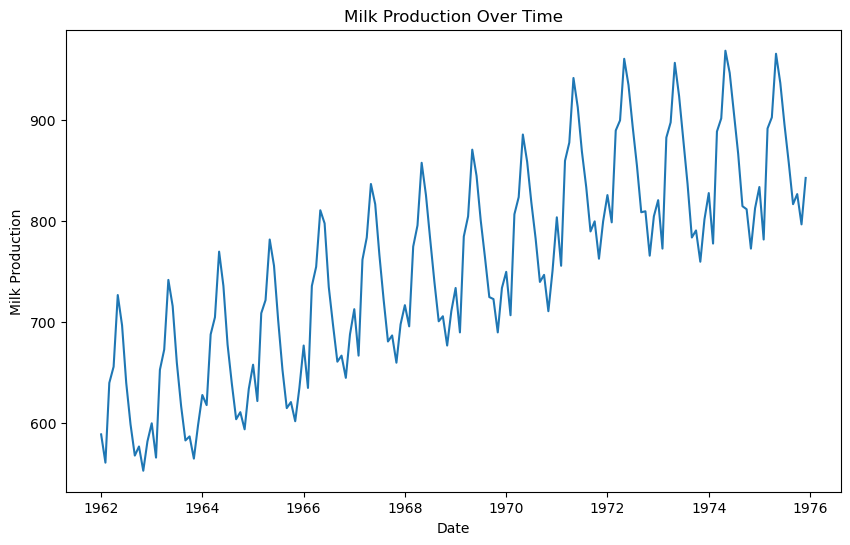

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Milk Production Over Time')
plt.xlabel('Date')
plt.ylabel('Milk Production')
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [7]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [8]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train, sequence_length)
X_test, y_test = create_sequences(test, sequence_length)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [11]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
124/124 [==============================] - 3s 2ms/step - loss: 0.0644
Epoch 2/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 3/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 4/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 5/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 6/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 7/100
124/124 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 8/100
124/124 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 9/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 10/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 11/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 12/100
124/124 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 13/100


124/124 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 100/100
124/124 [==============================] - 0s 3ms/step - loss: 0.0019


In [13]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [14]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [15]:
train_score = np.sqrt(np.mean(np.power((y_train - train_predict), 2)))
print(f"Train RMSE: {train_score:.2f}")

Train RMSE: 126.03


In [16]:
test_score = np.sqrt(np.mean(np.power((y_test - test_predict), 2)))
print(f"Test RMSE: {test_score:.2f}")

Test RMSE: 80.46
